In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/superstore-dataset-final


In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
files = os.listdir(path)

In [4]:
print('Arquivos no dataset', files)

Arquivos no dataset ['Sample - Superstore.csv']


In [5]:
csv_file = [file for file in files if file.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)
print(csv_path)

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [6]:
df = pd.read_csv(csv_path, encoding='latin1')

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
df.shape

(9994, 21)

In [7]:
df[['day_order', 'month_order', 'year_order']] = df['Order Date'].str.split('/', expand=True)

In [8]:
df = df.drop('Order Date', axis=1)

In [13]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,day_order,month_order,year_order
0,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,8,2016
1,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,8,2016
2,3,CA-2016-138688,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,12,2016
3,4,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,11,2015
4,5,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,11,2015


In [9]:
quantity_per_region = df.groupby('Region')['Quantity'].sum().sort_values(ascending=False)
region_sales = df.groupby('Region')['Sales'].sum()

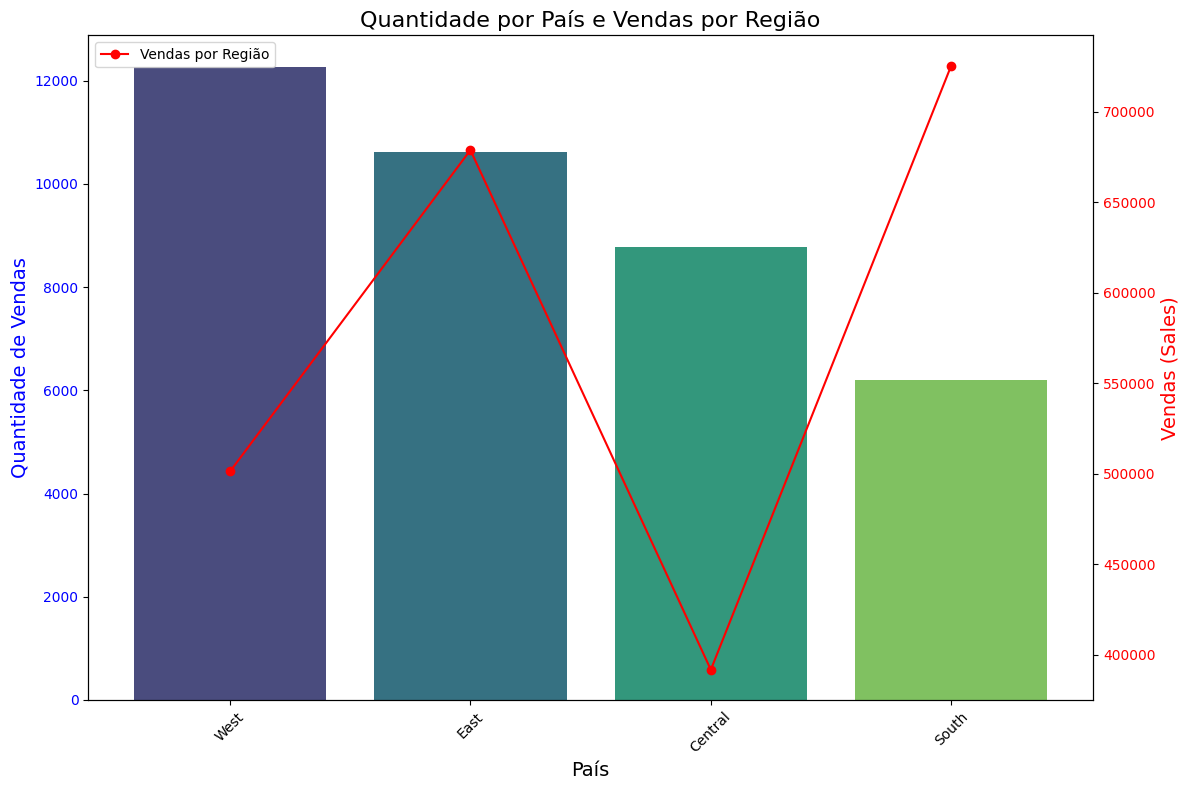

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(x=quantity_per_region.index, y=quantity_per_region.values, palette="viridis", ax=ax1)
ax1.set_xlabel('País', fontsize=14)
ax1.set_ylabel('Quantidade de Vendas', fontsize=14, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Quantidade por País e Vendas por Região', fontsize=16)
ax1.tick_params(axis='x', rotation=45)

# Criar um segundo eixo para o gráfico de linha
ax2 = ax1.twinx()
ax2.plot(region_sales.index, region_sales.values, color='r', marker='o', label='Vendas por Região')
ax2.set_ylabel('Vendas (Sales)', fontsize=14, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adicionar uma legenda
ax2.legend(loc='upper left')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [10]:
profit_per_year = df.groupby('year_order')['Profit'].sum().sort_values(ascending=True)

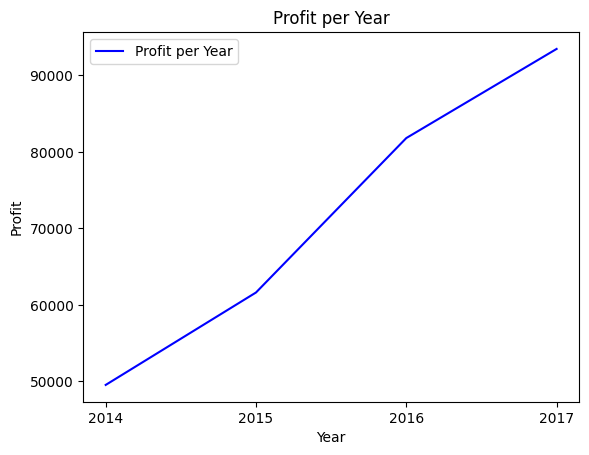

In [11]:
plt.plot(profit_per_year.index, profit_per_year.values, label='Profit per Year', color='blue')

plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit per Year')
plt.legend()
plt.show()

In [12]:
df['Sales_With_Discount'] = df['Sales'] * (1 - df['Discount'])
df['Profit_Sales_Ratio'] = df['Profit'] / df['Sales']
df['Profit_Sales_Ratio'].replace([np.inf, -np.inf], 0, inplace=True)
df['Profit_Sales_Ratio'].fillna(0, inplace=True)
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,day_order,month_order,year_order,Sales_With_Discount,Profit_Sales_Ratio
0,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,8,2016,261.960000,0.1600
1,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,8,2016,731.940000,0.3000
2,3,CA-2016-138688,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,12,2016,14.620000,0.4700
3,4,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,11,2015,526.667625,-0.4000
4,5,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,11,2015,17.894400,0.1125


In [13]:
intervalo_ = max(df['Sales_With_Discount'] - min(df['Sales_With_Discount']))
print(intervalo_)

17499.8612


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


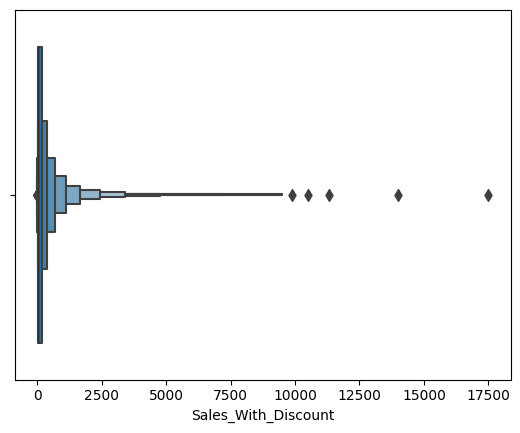

In [20]:
sns.boxenplot(x=df['Sales_With_Discount'])
plt.show()

In [14]:
Q1 = df['Sales_With_Discount'].quantile(0.25)
Q3 = df['Sales_With_Discount'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['Sales_With_Discount'] >= limite_inferior) & (df['Sales_With_Discount'] <= limite_superior)]

In [15]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['Profit'] >= limite_inferior) & (df['Profit'] <= limite_superior)]

In [16]:
df[['day_ship', 'month_ship', 'year_ship']] = df['Ship Date'].str.split('/', expand=True)
df = df.drop('Ship Date', axis=1)
df.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Discount,Profit,day_order,month_order,year_order,Sales_With_Discount,Profit_Sales_Ratio,day_ship,month_ship,year_ship
0,1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,0.0,41.9136,11,8,2016,261.9600,0.1600,11,11,2016
2,3,CA-2016-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,0.0,6.8714,6,12,2016,14.6200,0.4700,6,16,2016
4,5,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,0.2,2.5164,10,11,2015,17.8944,0.1125,10,18,2015
5,6,CA-2014-115812,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,0.0,14.1694,6,9,2014,48.8600,0.2900,6,14,2014
6,7,CA-2014-115812,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,0.0,1.9656,6,9,2014,7.2800,0.2700,6,14,2014


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7356 entries, 0 to 9992
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Row ID               7356 non-null   int64  
 1   Order ID             7356 non-null   object 
 2   Ship Mode            7356 non-null   object 
 3   Customer ID          7356 non-null   object 
 4   Customer Name        7356 non-null   object 
 5   Segment              7356 non-null   object 
 6   Country              7356 non-null   object 
 7   City                 7356 non-null   object 
 8   State                7356 non-null   object 
 9   Postal Code          7356 non-null   int64  
 10  Region               7356 non-null   object 
 11  Product ID           7356 non-null   object 
 12  Category             7356 non-null   object 
 13  Sub-Category         7356 non-null   object 
 14  Product Name         7356 non-null   object 
 15  Sales                7356 non-null   float6

In [17]:
df = df.drop('Customer Name', axis=1)
df = df.drop('Row ID', axis=1)
df.head()

,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,...,Discount,Profit,day_order,month_order,year_order,Sales_With_Discount,Profit_Sales_Ratio,day_ship,month_ship,year_ship
0,CA-2016-152156,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,...,0.0,41.9136,11,8,2016,261.9600,0.1600,11,11,2016
2,CA-2016-138688,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,...,0.0,6.8714,6,12,2016,14.6200,0.4700,6,16,2016
4,US-2015-108966,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,...,0.2,2.5164,10,11,2015,17.8944,0.1125,10,18,2015
5,CA-2014-115812,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,...,0.0,14.1694,6,9,2014,48.8600,0.2900,6,14,2014
6,CA-2014-115812,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,...,0.0,1.9656,6,9,2014,7.2800,0.2700,6,14,2014


In [18]:
df = df.drop('Country', axis=1)

In [27]:
df.head()

,Order ID,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,...,Discount,Profit,day_order,month_order,year_order,Sales_With_Discount,Profit_Sales_Ratio,day_ship,month_ship,year_ship
0,CA-2016-152156,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,...,0.0,41.9136,11,8,2016,261.9600,0.1600,11,11,2016
2,CA-2016-138688,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,...,0.0,6.8714,6,12,2016,14.6200,0.4700,6,16,2016
4,US-2015-108966,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,...,0.2,2.5164,10,11,2015,17.8944,0.1125,10,18,2015
5,CA-2014-115812,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,...,0.0,14.1694,6,9,2014,48.8600,0.2900,6,14,2014
6,CA-2014-115812,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,...,0.0,1.9656,6,9,2014,7.2800,0.2700,6,14,2014


In [19]:
category_counts = df.groupby(['year_order', 'Category']).size().reset_index(name='Quantity')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


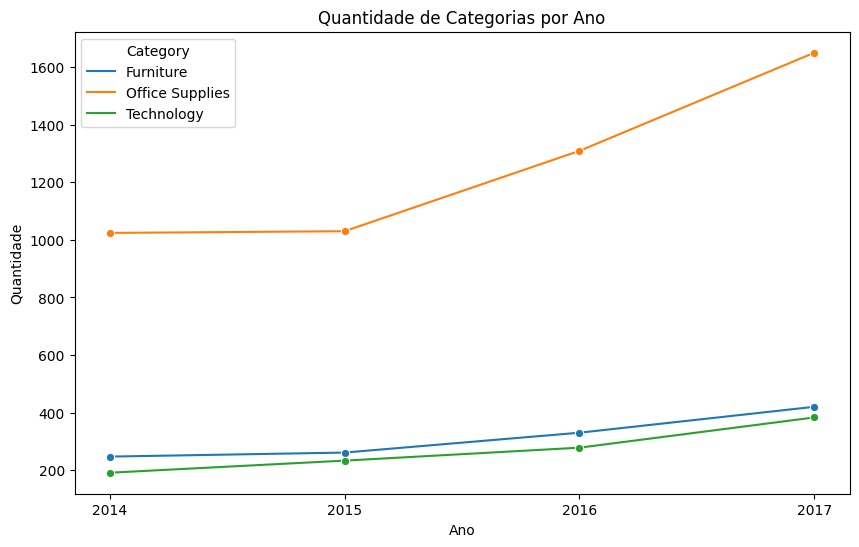

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=category_counts, x='year_order', y='Quantity', hue='Category', marker='o')

# Configurar o gráfico
plt.title('Quantidade de Categorias por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

# Mostrar o gráfico
plt.show()

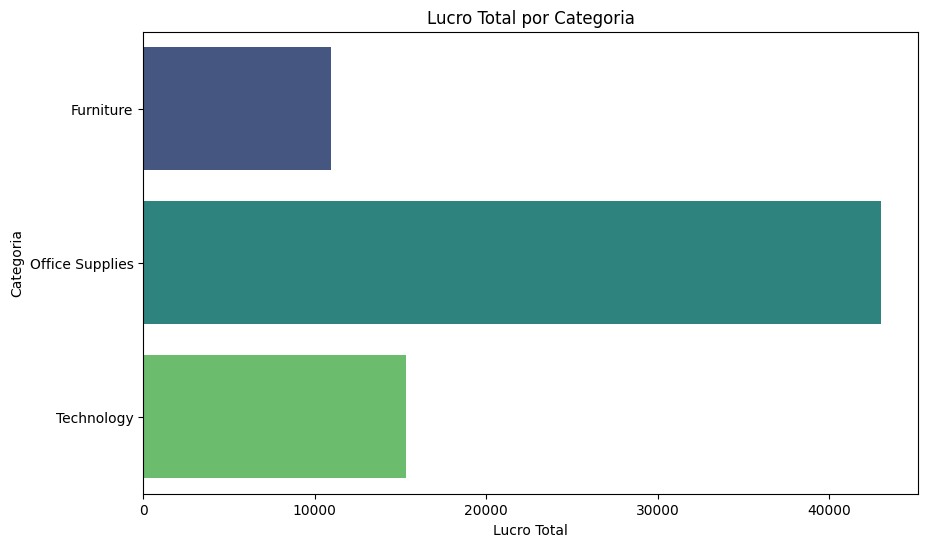

In [30]:
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Category', data=category_profit, palette="viridis")

plt.title('Lucro Total por Categoria')
plt.xlabel('Lucro Total')
plt.ylabel('Categoria')

plt.show()

In [20]:
df = df.drop('Customer ID', axis=1)
df = df.drop('Postal Code', axis=1)
df = df.drop('Product ID', axis=1)
df = df.drop('day_order', axis=1)
df = df.drop('month_order', axis=1)
df = df.drop('day_ship', axis=1)
df = df.drop('month_ship', axis=1)
df = df.drop('year_ship', axis=1)
df = df.drop('Sales', axis=1)

In [32]:
df.head()

,Order ID,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Quantity,Discount,Profit,year_order,Sales_With_Discount,Profit_Sales_Ratio
0,CA-2016-152156,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,2,0.0,41.9136,2016,261.9600,0.1600
2,CA-2016-138688,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2,0.0,6.8714,2016,14.6200,0.4700
4,US-2015-108966,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2,0.2,2.5164,2015,17.8944,0.1125
5,CA-2014-115812,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,7,0.0,14.1694,2014,48.8600,0.2900
6,CA-2014-115812,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,Newell 322,4,0.0,1.9656,2014,7.2800,0.2700


In [21]:
df['category_subCategory'] = df['Category'] + '_' + df['Sub-Category']


df = df.drop('Category', axis=1)
df = df.drop('Sub-Category', axis=1)

In [22]:
features = ['Order ID', 'Ship Mode', 'Segment', 'City', 'State', 'Region', 'Product Name', 'category_subCategory', 'year_order']


onehot = OneHotEncoder(sparse_output=False, drop='first')

encoded_data = onehot.fit_transform(df[features])

columns_to_encoded = onehot.get_feature_names_out(features)

encoded_df = pd.DataFrame(encoded_data, columns=columns_to_encoded, index=df.index)

df = pd.concat([df.drop(columns=features), encoded_df], axis=1)

df.head()


,Quantity,Discount,Profit,Sales_With_Discount,Profit_Sales_Ratio,Order ID_CA-2014-100328,Order ID_CA-2014-100363,Order ID_CA-2014-100391,Order ID_CA-2014-100678,Order ID_CA-2014-100706,...,category_subCategory_Office Supplies_Labels,category_subCategory_Office Supplies_Paper,category_subCategory_Office Supplies_Storage,category_subCategory_Office Supplies_Supplies,category_subCategory_Technology_Accessories,category_subCategory_Technology_Machines,category_subCategory_Technology_Phones,year_order_2015,year_order_2016,year_order_2017
0,2,0.0,41.9136,261.9600,0.1600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.0,6.8714,14.6200,0.4700,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,0.2,2.5164,17.8944,0.1125,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,7,0.0,14.1694,48.8600,0.2900,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4,0.0,1.9656,7.2800,0.2700,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
data_for_clustering = df[['Sales_With_Discount', 'Profit', 'Quantity']]

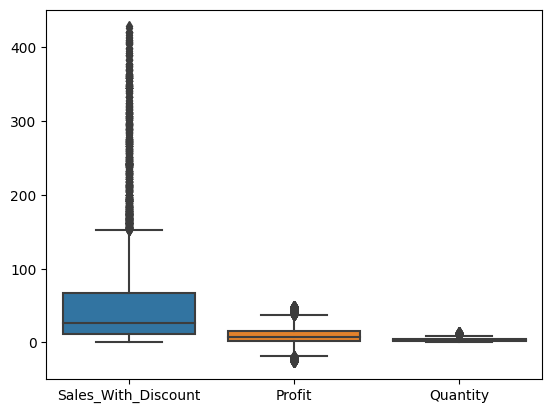

In [36]:
sns.boxplot(data=data_for_clustering)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

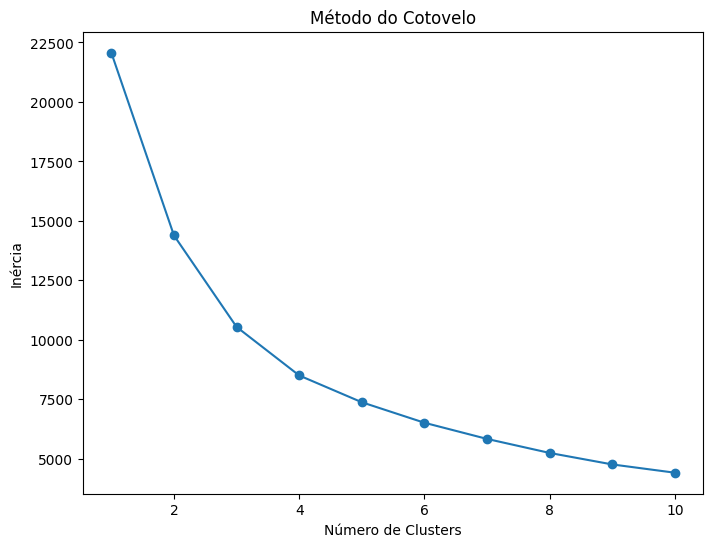

In [77]:
scaler = StandardScaler()
data_standarded = scaler.fit_transform(data_for_clustering)

inertia = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans = kmeans.fit(data_standarded)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


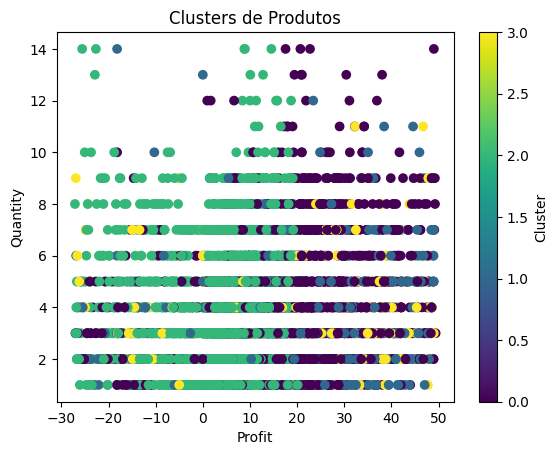

In [79]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_for_clustering)

df['Cluster'] = kmeans.labels_

plt.scatter(df['Profit'], df['Quantity'], c=df['Cluster'], cmap='viridis')
plt.title('Clusters de Produtos')
plt.xlabel('Profit')
plt.ylabel('Quantity')
plt.colorbar(label='Cluster')
plt.show()

In [39]:
df = df.drop('Cluster', axis=1)
df.head()

,Quantity,Discount,Profit,Sales_With_Discount,Profit_Sales_Ratio,Order ID_CA-2014-100328,Order ID_CA-2014-100363,Order ID_CA-2014-100391,Order ID_CA-2014-100678,Order ID_CA-2014-100706,...,category_subCategory_Office Supplies_Labels,category_subCategory_Office Supplies_Paper,category_subCategory_Office Supplies_Storage,category_subCategory_Office Supplies_Supplies,category_subCategory_Technology_Accessories,category_subCategory_Technology_Machines,category_subCategory_Technology_Phones,year_order_2015,year_order_2016,year_order_2017
0,2,0.0,41.9136,261.9600,0.1600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.0,6.8714,14.6200,0.4700,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,0.2,2.5164,17.8944,0.1125,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,7,0.0,14.1694,48.8600,0.2900,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4,0.0,1.9656,7.2800,0.2700,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X = df.drop('Sales_With_Discount', axis=1)
y = df['Sales_With_Discount']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)

In [43]:
X_train_scaled

array([[ 0.74896572, -0.74746219,  2.52030309, ..., -0.51197584,
        -0.59252907,  1.39938218],
       [-0.71415324,  3.22608184, -0.91949873, ..., -0.51197584,
         1.68768091, -0.71460107],
       [ 0.2612594 , -0.74746219, -0.66905727, ..., -0.51197584,
         1.68768091, -0.71460107],
       ...,
       [-0.22644692,  0.24592382,  0.37375878, ...,  1.95321716,
        -0.59252907, -0.71460107],
       [-0.22644692, -0.74746219, -0.68075642, ..., -0.51197584,
        -0.59252907,  1.39938218],
       [-0.22644692,  0.24592382,  1.43410882, ...,  1.95321716,
        -0.59252907, -0.71460107]])

In [26]:
X_test_scaled = standard_scaler.fit_transform(X_test)

In [59]:

model_rfr = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

random_search = RandomizedSearchCV(
    estimator=model_rfr,
    param_distributions=param_grid,
    n_iter=5,  # Testa 5 combinações aleatórias
    cv=3,  # Reduz o número de folds
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)
print(f"Melhores parâmetros: {random_search.best_params_}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Melhores parâmetros: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [60]:
best_model = random_search.best_estimator_

In [61]:
print(best_model.feature_importances_)

[1.26962822e-02 5.60255980e-03 4.23072645e-01 ... 3.65143196e-04
 4.73593928e-04 8.22643483e-04]


In [62]:

features_ = X_train.columns
importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': features_,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                    Feature    Importance
2                                    Profit  4.230726e-01
3                        Profit_Sales_Ratio  4.206990e-01
6447  category_subCategory_Furniture_Chairs  5.622407e-02
0                                  Quantity  1.269628e-02
6449  category_subCategory_Furniture_Tables  7.081390e-03
...                                     ...           ...
1442                Order ID_CA-2015-168186 -1.964771e-23
2640                Order ID_CA-2017-114412 -3.651693e-23
6378                Product Name_Xerox 1985 -6.554191e-23
3404                Order ID_CA-2017-160017 -6.637097e-23
1673                Order ID_CA-2016-115504 -9.936537e-23

[6465 rows x 2 columns]


In [63]:
low_importances = importance_df[importance_df['Importance'].abs() > 0.005]
print(low_importances)

                                                Feature  Importance
2                                                Profit    0.423073
3                                    Profit_Sales_Ratio    0.420699
6447              category_subCategory_Furniture_Chairs    0.056224
0                                              Quantity    0.012696
6449              category_subCategory_Furniture_Tables    0.007081
6457       category_subCategory_Office Supplies_Storage    0.006546
1                                              Discount    0.005603
6151  Product Name_Tenex 46" x 60" Computer Anti-Sta...    0.005029


In [64]:
select_columns = low_importances['Feature']
X_train_reduces = X_train[select_columns]
X_test_reduces = X_test[select_columns]

X_train_reduces_scaled = standard_scaler.fit_transform(X_train_reduces)

random_search.fit(X_train_reduces_scaled, y_train)

best_model = random_search.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [65]:
standard_scaler = StandardScaler()
X_test_reduces_scaled = standard_scaler.fit_transform(X_test_reduces)
y_pred_rmse = best_model.predict(X_test_reduces_scaled)

In [66]:
print("Erro médio quadrático:", mean_squared_error(y_test, y_pred_rmse))

Erro médio quadrático: 625.2984141561578


In [67]:
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_rmse))
print("RMSE:", rmse_random)

RMSE: 25.00596757088511


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_dist = {
    'n_estimators': [100,200,300],
    'learning_rate': np.logspace(-3, -1, 10),
    'max_depth': [3,5]
}

random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2
)


In [30]:
random_search.fit(X_train_scaled, y_train)

best_model = random_search.best_estimator_
print(f"Melhores parâmetros: {random_search.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores parâmetros: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05994842503189409}


In [31]:
y_pred_gdb = best_model.predict(X_test_scaled)
rmse_gdb = np.sqrt(mean_squared_error(y_test, y_pred_gdb))
print(f"RMSE após otimização: {rmse_gdb}")

RMSE após otimização: 25.913613303850475


In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_gdb)
print(r2)

0.8802009372374111


In [69]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_rmse)
print(r2)

0.8884460891844937


Text(0, 0.5, 'RMSE')

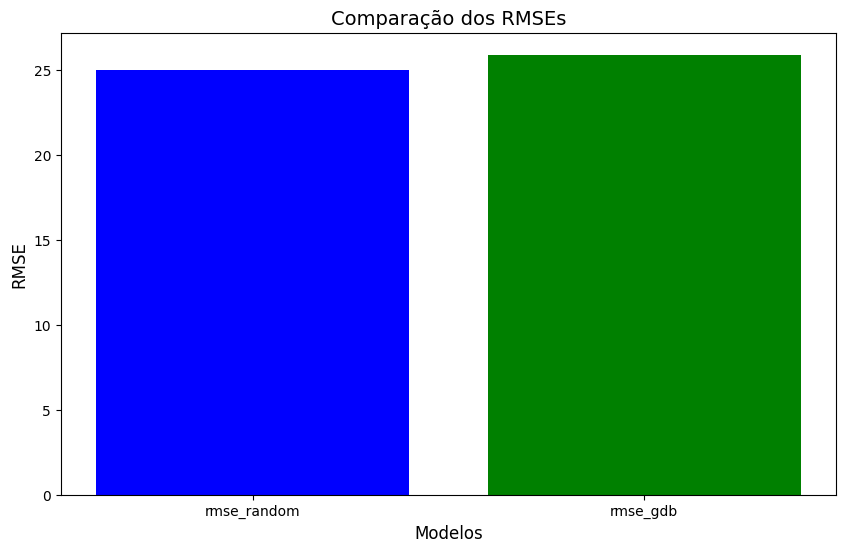

In [70]:
rmses = ['rmse_random', 'rmse_gdb']
values = [rmse_random, rmse_gdb]

plt.figure(figsize=(10, 6))
plt.bar(rmses, values, color=['blue', 'green', 'red'])

plt.title('Comparação dos RMSEs', fontsize=14)
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

In [71]:
media_y_real = y_test.mean()
erro_percentual = (rmse_random/media_y_real) * 100
print(f"Erro percentual: {erro_percentual:.2f}%")

Erro percentual: 43.43%


In [35]:
media_y_real = y_test.mean()
erro_percentual = (rmse_gdb/media_y_real) * 100
print(f"Erro percentual: {erro_percentual:.2f}%")

Erro percentual: 45.01%


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test_scaled)

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.005), loss='mse', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr], verbose=1)

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 4842.1787 - mae: 43.0326 - val_loss: 2608.6328 - val_mae: 27.0907 - learning_rate: 0.0050
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2079.1323 - mae: 24.8909 - val_loss: 1808.7092 - val_mae: 23.2364 - learning_rate: 0.0050
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1346.4846 - mae: 19.1809 - val_loss: 2468.4138 - val_mae: 25.5173 - learning_rate: 0.0050
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 948.7762 - mae: 17.2138 - val_loss: 1778.1167 - val_mae: 23.2581 - learning_rate: 0.0050
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 782.7213 - mae: 15.7005 - val_loss: 1719.5443 - val_mae: 23.3663 - learning_rate: 0.0050
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 768.9319 - mae: 15.2681 - val_loss: 1769.4050 - val_mae: 22.3422 - learning_rate: 0.0050
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 804.0803 - mae: 15.2163 - val_loss:

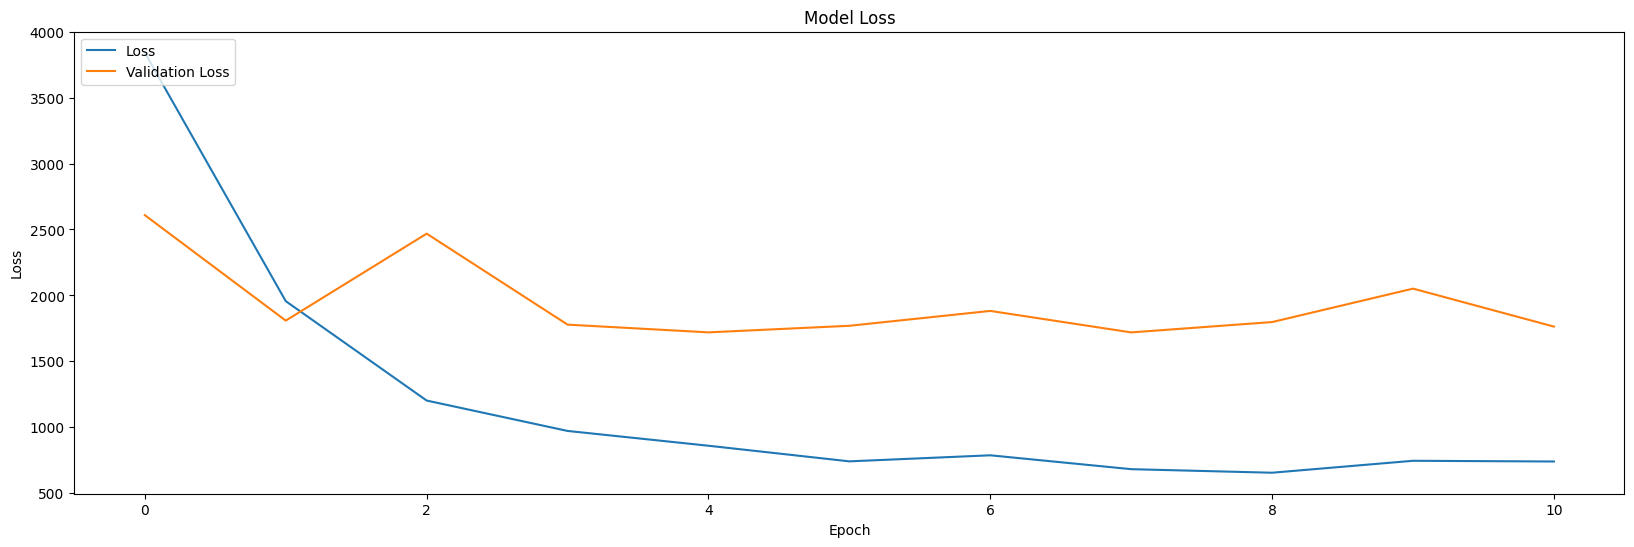

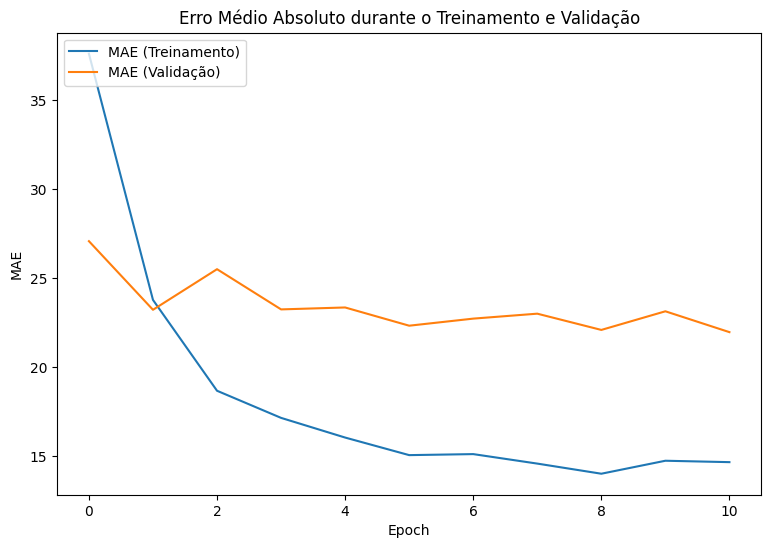

In [74]:
plt.figure(figsize=(20,6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plotando o erro médio absoluto (MAE)
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 2)  # Gráfico 2 (sub-plot)
plt.plot(history.history['mae'], label='MAE (Treinamento)')
plt.plot(history.history['val_mae'], label='MAE (Validação)')
plt.title('Erro Médio Absoluto durante o Treinamento e Validação')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper left')
plt.show()

In [47]:
y_pred = model.predict(X_test_scaled)

rmse_rna = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE: 44.874389084341836


In [48]:
media_y_real = y_test.mean()
erro_percentual = (rmse_rna/media_y_real) * 100
print(f"Erro percentual: {erro_percentual:.2f}%")

Erro percentual: 77.94%


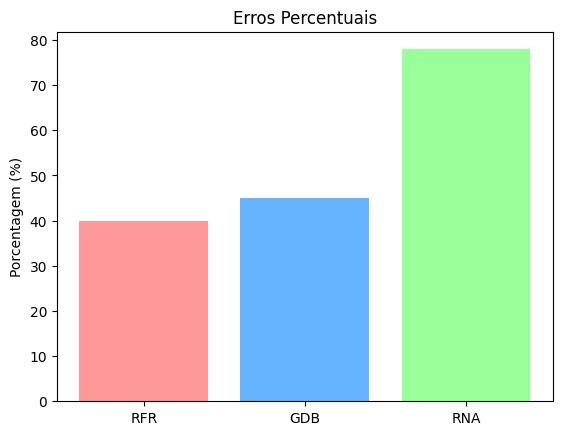

In [58]:
categories = ['RFR', 'GDB', 'RNA']
percentages = [40, 45.01, 77.94]

# Gráfico de barras
plt.bar(categories, percentages, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.ylabel('Porcentagem (%)')
plt.title('Erros Percentuais')
plt.show()